In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
ratings=pd.read_csv("ratings.csv")
movies=pd.read_csv("movies.csv")

In [98]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [109]:
print("Mean rating:", ratings['rating'].mean(axis=0))
print("Median rating:", ratings['rating'].median(axis=0))
print("Standard Deviation of rating:", ratings['rating'].std(axis=0))

Mean rating: 3.501556983616962
Median rating: 3.5
Standard Deviation of rating: 1.0425292390605359


In [100]:
filteredratings=ratings[['movieId','rating']].groupby('movieId').count().sort_values(by="movieId")
filteredratings=filteredratings.rename(columns={'rating':'Number_of_Ratings'})
temp=ratings[['movieId','rating']].groupby('movieId').mean().sort_values(by="movieId")
temp=temp.rename(columns={'rating':'Average_Rating'})
filteredratings=pd.merge(temp,filteredratings,on='movieId')

In [101]:
filteredratings=pd.merge(movies,filteredratings,on='movieId').sort_values(by=["Number_of_Ratings","Average_Rating"], ascending=False)

In [102]:
filteredratings.head()

,movieId,title,genres,Average_Rating,Number_of_Ratings
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278


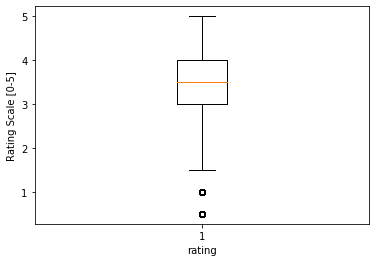

In [117]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(ratings['rating'])

ax.set_ylabel('Rating Scale [0-5]')

plt.show()